#  Alzhiemer's Diesease Classification using Deep Learning Techniques

In [ ]:
# Here We have imported all the necessary libraries needed
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2

#Here I have put my AD classification dataset in an input folder on my desktop.
import os
print(os.listdir("C:/Users/Abhishek Nagrecha/Desktop/input"))

# Import .jpg images and Apply the essential Pre-processing Steps

In [ ]:
# Here we created labels for our MildDemented MRI class and did some pre-processing like resizing the images, 
#changing its color from RGB to BGR which usually works well with the openCV.
# This was done using the openCV library
images = []
labels = [] 
for dir_path in glob.glob("C:/Users/Abhishek Nagrecha/Desktop/input/Alzheimer_s Dataset/train/MildDemented/"):
    label = "MildDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)
for dir_path in glob.glob("C:/Users/Abhishek Nagrecha/Desktop/input/Alzheimer_s Dataset/test/MildDemented/"):
    label = "MildDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)

In [ ]:
# Here we created labels for our veryMildDemented MRI class and did some pre-processing like resizing the images, 
#changing its color from RGB to BGR which usually works well with the openCV.
# This was done using the openCV library

for dir_path in glob.glob("C:/Users/Abhishek Nagrecha/Desktop/input/Alzheimer_s Dataset/train/VeryMildDemented/"):
    label = "VeryMildDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)
for dir_path in glob.glob("C:/Users/Abhishek Nagrecha/Desktop/input/Alzheimer_s Dataset/test/VeryMildDemented/"):
    label = "VeryMildDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)

In [ ]:
# Here we created labels for our ModerateDemented MRI class and did some pre-processing like resizing the images, 
#changing its color from RGB to BGR which usually works well with the openCV.
# This was done using the openCV library

for dir_path in glob.glob("C:/Users/Abhishek Nagrecha/Desktop/input/Alzheimer_s Dataset/train/ModerateDemented/"):
    label = "ModerateDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)
for dir_path in glob.glob("C:/Users/Abhishek Nagrecha/Desktop/input/Alzheimer_s Dataset/test/ModerateDemented/"):
    label = "ModerateDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)

In [ ]:
# Here we created labels for our NonDemented MRI class and did some pre-processing like resizing the images, 
#changing its color from RGB to BGR which usually works well with the openCV.
# This was done using the openCV library

for dir_path in glob.glob("C:/Users/Abhishek Nagrecha/Desktop/input/Alzheimer_s Dataset/train/NonDemented/"):
    label = "NonDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)
for dir_path in glob.glob("C:/Users/Abhishek Nagrecha/Desktop/input/Alzheimer_s Dataset/test/NonDemented/"):
    label = "NonDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)
images = np.array(images)
labels = np.array(labels)

In [ ]:
# Labeled the four different classes of MRI images by using the id_to_label_dict method.

label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

In [ ]:
#These are our four different classes of the Brain MRI images
id_to_label_dict

{0: 'MildDemented',
 1: 'ModerateDemented',
 2: 'NonDemented',
 3: 'VeryMildDemented'}

In [ ]:
label_ids = np.array([label_to_id_dict[x] for x in labels])

In [ ]:
#This is our images input shape and also the shape of our labels
images.shape, label_ids.shape, labels.shape

((6400, 45, 45, 3), (6400,), (6400,))

# Prepare test (30%) and train (70%)

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(images,label_ids, test_size = 0.30)  

In [ ]:
X_train

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [ ]:
y_train

array([3, 2, 1, ..., 3, 3, 2])

In [ ]:
# Normalized the data images to the range of [0, 1]. 
# Because the value of the RGB varies from 0 to 255, since it requires precisely one byte of data. 
# One byte is equivalent to 8 bytes, and each bit indicates either a 0 or a 1 
# and we divide all train and test images by 255 to simplify the vector procedures.

X_train = X_train/255
X_test = X_test/255


#Make a flattened version for some of our models
X_flat_train = X_train.reshape(X_train.shape[0], 45*45*3)
X_flat_test = X_test.reshape(X_test.shape[0], 45*45*3)


In [ ]:
y_train

array([3, 2, 1, ..., 3, 3, 2])

In [ ]:
# #One Hot Encode the Output
# One-hot encoding are a way for the model to understand that we're looking at categorical instead of continuous data.
# since that is the format required by Keras to perform multiclass classification. 
# It transforms the integer to a sequence of all zeros at the integer index save for a 1. 
# When the above step was finished, we had to hot encode our data by using the to categorical() function 
# since we have multi-class results(0–3:4 output).
# In our case, this effectively transforms a class vector (integers) to a binary type matrix 
# for categorical_crossentropy use

y_train = keras.utils.to_categorical(y_train, 4)
y_test = keras.utils.to_categorical(y_test, 4)

print('Original Sizes:', X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('Flattened:', X_flat_train.shape, X_flat_test.shape)

Original Sizes: (4480, 45, 45, 3) (1920, 45, 45, 3) (4480, 4) (1920, 4)
Flattened: (4480, 6075) (1920, 6075)


(45, 45, 3)


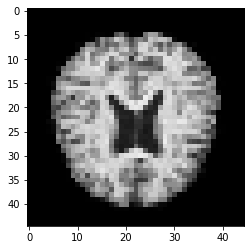

In [ ]:
print(X_train[0].shape)
plt.imshow(X_train[0])
plt.show()


In [ ]:
#Here we have Imported the necessary libraries for CNN

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, SGD

# Import the backend
from keras import backend as K

# CNN (convolutional Neural Network) Model 

Train on 4480 samples, validate on 1920 samples
Epoch 1/20
4480/4480 [==============================] - 26s 6ms/step - loss: 1.1794 - accuracy: 0.4775 - val_loss: 1.0134 - val_accuracy: 0.5094
Epoch 2/20
4480/4480 [==============================] - 25s 6ms/step - loss: 1.0348 - accuracy: 0.4828 - val_loss: 1.0472 - val_accuracy: 0.5094
Epoch 3/20
4480/4480 [==============================] - 25s 6ms/step - loss: 1.0034 - accuracy: 0.5174 - val_loss: 0.9565 - val_accuracy: 0.5115
Epoch 4/20
4480/4480 [==============================] - 21s 5ms/step - loss: 0.9722 - accuracy: 0.5420 - val_loss: 0.9572 - val_accuracy: 0.5510
Epoch 5/20
4480/4480 [==============================] - 17s 4ms/step - loss: 0.9199 - accuracy: 0.5797 - val_loss: 0.8561 - val_accuracy: 0.5922
Epoch 6/20
4480/4480 [==============================] - 17s 4ms/step - loss: 0.8881 - accuracy: 0.5819 - val_loss: 0.8685 - val_accuracy: 0.5802
Epoch 7/20
4480/4480 [==============================] - 18s 4ms/step - loss: 0.854

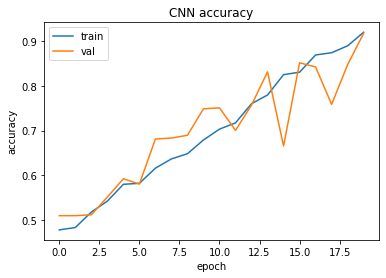

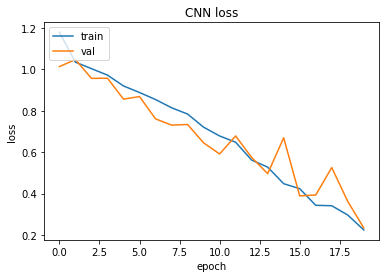

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 43, 43, 32)        896       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
dropout_68 (Dropout)         (None, 20, 20, 64)        0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 25600)             0         
_________________________________________________________________
dense_116 (Dense)            (None, 128)               3276928   
_________________________________________________________________
dropout_69 (Dropout)         (None, 128)             

In [ ]:
model_cnn = Sequential()
# This id our First convolutional layer, where we have given a specified Input MRI image Shape
model_cnn.add(Conv2D(32, kernel_size=(3, 3), #Kernel size is 3
                 activation='relu',
                 input_shape=(45, 45, 3)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25)) #Adding layers
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout( 0.5))
model_cnn.add(Dense(4, activation='softmax'))

# Now here we are Compiling the model.

model_cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(), # Optimizer used here is adadelta
              metrics=['accuracy'])

# 128 MRI images propagated through the network and with 20 passes over the entire dataset

history= model_cnn.fit(X_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_cnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) # Print output values

#Here we have plotted the accuracy and the loss curve for the CNN 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN accuracy')
plt.ylabel('accuracy') # Set y-axis label as 'accuracy'.
plt.xlabel('epoch') # Set x-axis label as 'epoch'.
plt.legend(['train', 'val'], loc='upper left')
plt.show() # Plot graph

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN loss')
plt.ylabel('loss') # Set y-axis label as 'loss'.
plt.xlabel('epoch') # Set x-axis label as 'epoch'.
plt.legend(['train', 'val'], loc='upper left')
plt.show() # Plot graph

model_cnn.summary() # Model sequential_33

# ANN (Artificial Neural Network) Model 


Train on 3136 samples, validate on 1344 samples
Epoch 1/50
3136/3136 [==============================] - 6s 2ms/step - loss: 1.1927 - accuracy: 0.4515 - val_loss: 1.0117 - val_accuracy: 0.4821
Epoch 2/50
3136/3136 [==============================] - 3s 900us/step - loss: 1.0612 - accuracy: 0.4876 - val_loss: 0.9945 - val_accuracy: 0.4814
Epoch 3/50
3136/3136 [==============================] - 3s 915us/step - loss: 1.0354 - accuracy: 0.4981 - val_loss: 0.9611 - val_accuracy: 0.5060
Epoch 4/50
3136/3136 [==============================] - 3s 987us/step - loss: 1.0167 - accuracy: 0.5105 - val_loss: 0.9848 - val_accuracy: 0.5246
Epoch 5/50
3136/3136 [==============================] - 3s 866us/step - loss: 0.9920 - accuracy: 0.5290 - val_loss: 1.0712 - val_accuracy: 0.4963
Epoch 6/50
3136/3136 [==============================] - 3s 863us/step - loss: 0.9761 - accuracy: 0.5309 - val_loss: 0.9251 - val_accuracy: 0.5156
Epoch 7/50
3136/3136 [==============================] - 3s 938us/step - loss: 

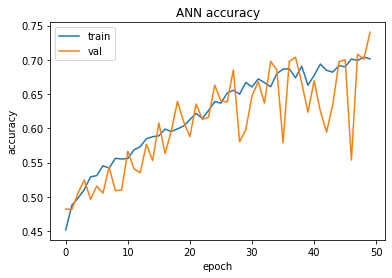

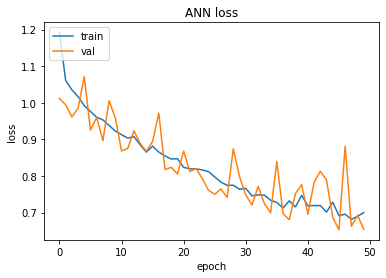

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_62 (Dropout)         (None, 45, 45, 3)         0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 6075)              0         
_________________________________________________________________
dense_109 (Dense)            (None, 128)               777728    
_________________________________________________________________
dense_110 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_63 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_111 (Dense)            (None, 4)                 260       
Total params: 786,244
Trainable params: 786,244
Non-trainable params: 0
_______________________________________________

In [ ]:
# This step creates an ANN model.
modelann = keras.models.Sequential() #define model ANN
modelann.add(Dropout(0.25))
modelann.add(Flatten()) # Add layers
modelann.add(Dense(128, activation='relu'))
modelann.add(Dense(64, activation='relu')) 
modelann.add(Dropout(0.5))
modelann.add(Dense(4, activation='softmax'))
# Now here we are Compiling the model.
modelann.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(), # Optimizer used here is Adadelta
              metrics=['accuracy'])


# 32 MRI images are propagated through the network and with 50 passes over the entire dataset

history= modelann.fit(X_train, y_train,
          batch_size=32,
          epochs=50,
          verbose=1, 
          validation_split=(0.3)) # Split 30:70
score = modelann.evaluate(X_test, y_test, verbose=0)
print(X_train.shape)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) # Output loss and accuracy values.

#Here we have plotted the accuracy and the loss curve for the ANN as follows.
plt.plot(history.history['accuracy']). # Display catogories of each curve.
plt.plot(history.history['val_accuracy'])
plt.title('ANN accuracy') # Set title of the graph.
plt.ylabel('accuracy')  # Set y-axis label as 'accuracy'.
plt.xlabel('epoch') # Set x-axis label as 'epoch'.
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) # Display catogories of each curve.
plt.title('ANN loss') # Set title of the graph.
plt.ylabel('loss') # Set y-axis label as 'loss'.
plt.xlabel('epoch') # Set x-axis label as 'epoch'.
plt.legend(['train', 'val'], loc='upper left')
plt.show()

modelann.summary() #Generates summary of ANN model.


# Multi layer neural network with 5 hidden layers


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 256)               1555456   
_________________________________________________________________
dropout_36 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_37 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_38 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)              

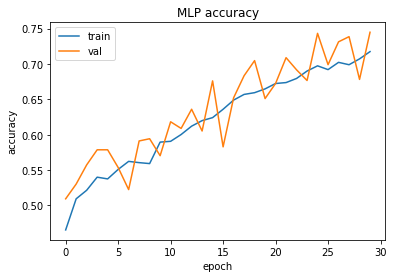

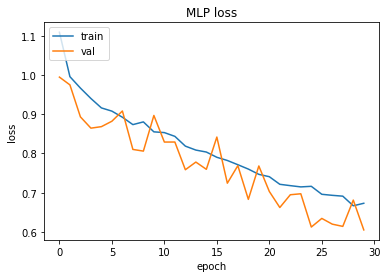

In [ ]:
# This step creates a MLP model with five hidden layers
model_deep = Sequential()


# Here we have Added these dense layers to create a fully connected Multi Layer Perceptron
# Here we have also specifed an input shape for the first layer just like the CNN model above.
# Here in MLP we have used Relu as the activation function 
model_deep.add(Dense(256, activation='relu', input_shape=(X_flat_train.shape[1],)))
# Here we have made use of the Dropout layers to remove features and additionally fight overfitting
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
#Here we ended the network with a number of units equal to the number of classes we have for our outcome(4 MRI classes)
model_deep.add(Dense(4, activation='softmax'))

model_deep.summary()

# Now we Compile the model to put it all together.
model_deep.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(), # Optimizer used here is RMSprop
              metrics=['accuracy'])

# 32 MRI images propagated through the network and with 30 passes over the entire dataset

history = model_deep.fit(X_flat_train, y_train,
                          batch_size=32,
                          epochs=30,
                          verbose=1,
                          validation_data=(X_flat_test, y_test))
score = model_deep.evaluate(X_flat_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])# Output loss and accuracy values.

#Here we have plotted the accuracy and the loss curve for the MLP
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP accuracy')# Set title of the graph.
plt.ylabel('accuracy')# Set y-axis label as 'accuracy'.
plt.xlabel('epoch')# Set x-axis label as 'epoch'.
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) # Display catogories of each curve.
plt.title('MLP loss')# Set title of the graph.
plt.ylabel('loss')# Set y-axis label as 'loss'.
plt.xlabel('epoch')# Set x-axis label as 'epoch'.
plt.legend(['train', 'val'], loc='upper left')
plt.show()

